# Street View House Numbers Classification



IMPORTANT:
To train and test the model, run everything in order except for the last cell (I mean you can run it too but then it wouldn't do anything).

To load a pretrained model, run the first cell, then the second cell, the last cell and then the second last cell.

init

Using TensorFlow backend.


Test set present at /home/wanderlynx1/.keras/datasets/test_32x32.mat
Imported object is a <class 'dict'>
dict_keys(['X', '__header__', 'y', '__version__', '__globals__'])
Train set has the following shape:
(32, 32, 3, 604388) (604388, 1)


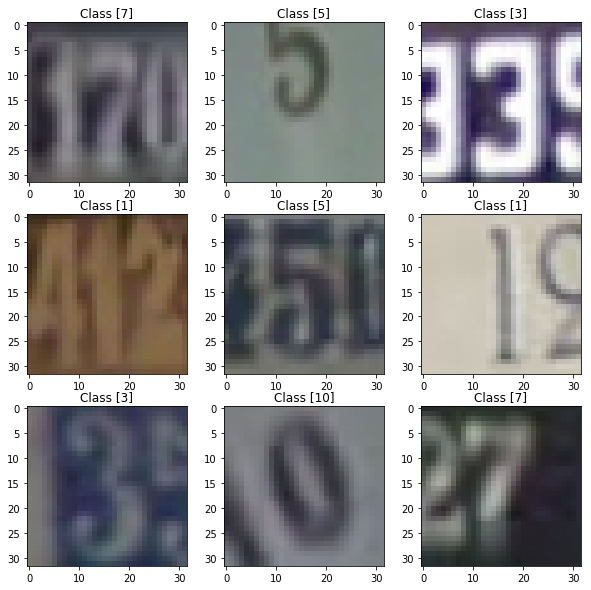

10 unique classes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


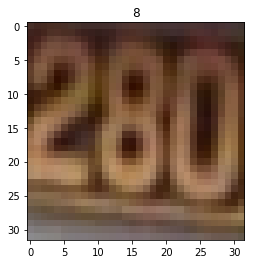

y_train.shape (483510, 11)
y_val.shape (120878, 11)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [1]:
# let's just choose to import all we need at the start
# this keeps the code below neater
from collections import Counter
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from keras.utils import multi_gpu_model
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
import sklearn.model_selection
#specify the seed to prevent randomness
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
# Use Python to download the dataset
# (also on Kaggle at https://www.kaggle.com/victorythang113/street-view-house-number)
train_mat_pta = keras.utils.get_file("train_32x32_a.mat", "https://s3-ap-southeast-1.amazonaws.com/deeplearning-iap-material/train_32x32.mat")
train_mat_ptb = keras.utils.get_file("train_32x32_b.mat", "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat")
test_mat = keras.utils.get_file("test_32x32.mat", "https://s3-ap-southeast-1.amazonaws.com/deeplearning-iap-material/test_32x32.mat")
#train_mat = keras.utils.get_file("train_32x32_a.mat", "https://s3-ap-southeast-1.amazonaws.com/deeplearning-iap-material/train_32x32.mat")
#print("Train set present at", train_mat)
print("Test set present at", test_mat)
train_array1 = scipy.io.loadmat(train_mat_pta)
train_array2 = scipy.io.loadmat(train_mat_ptb)
num_images1 = train_array1["X"].shape[-1]
num_images2 = train_array2["X"].shape[-1]
train_array = train_array1
train_array["y"] = np.concatenate((train_array1["y"],train_array2["y"]))
train_array["X"] = np.concatenate((train_array1["X"],train_array2["X"]),axis = 3)
#train_array = scipy.io.loadmat(train_mat)
print("Imported object is a", type(train_array))
print(train_array.keys())

print("Train set has the following shape:")
print(train_array["X"].shape, train_array["y"].shape)


num_images = train_array["X"].shape[-1]

plt.figure(1, figsize=(10,10))

for i in range(9):
    n = random.randint(0, num_images-1) # pick a random image
    plt.subplot(3,3,i+1)
    image = train_array["X"][:,:,:,n].reshape((32,32,3))
    plt.imshow(image)
    plt.title("Class {}".format(train_array["y"][n]))
    
plt.show()

# we need to reshape the imported data to use it with Keras

list_labels = train_array["y"].reshape((num_images))
list_images = []

for i in range(num_images):
    image = train_array["X"][:,:,:,i].reshape((32,32,3))
    list_images.append(image)
    
list_labels = np.asarray(list_labels, dtype='int32')
list_images = np.asarray(list_images)

list_images.shape

classes = list(set(list_labels))
num_classes = len(classes)
print(num_classes, "unique classes:", classes)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(list_images, list_labels, test_size=0.2)

plt.figure(2)
n = random.randint(0, len(y_train))
plt.imshow(X_train[n])
plt.title(y_train[n])
plt.show()

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

print("y_train.shape", y_train.shape)
print("y_val.shape", y_val.shape)

to_categorical(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

# Build a CNN in Keras

See also:

*   [Convolutional filters in Keras](https://keras.io/layers/convolutional/)
*   [Functional API](https://keras.io/getting-started/functional-api-guide/) (allows you to build more complex models)


In [2]:
from keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization
from keras.models import Model

input_img = Input(shape=(32, 32, 3))
drop = 0.25
#32x32

xa1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu',)(input_img)
xa1 = BatchNormalization()(xa1)
xa2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu',)(input_img)
xa2 = BatchNormalization()(xa2)
xa3 = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu',)(input_img)
xa3 = BatchNormalization()(xa3)
xa4 = Conv2D(192, kernel_size=(7, 7), padding='same', activation='relu',)(input_img)
xa4 = BatchNormalization()(xa4)
xam = keras.layers.Maximum()([xa1,xa2,xa3,xa4])

xb1 = Conv2D(160, kernel_size=(1, 1), padding='same', activation='relu',)(xam)
xb1 = BatchNormalization()(xb1)
xb2 = Conv2D(160, kernel_size=(3, 3), padding='same', activation='relu',)(xam)
xb2 = BatchNormalization()(xb2)
xbm = keras.layers.Maximum()([xb1,xb2])

xc1 = Conv2D(96, kernel_size=(1, 1), padding='same', activation='relu')(xbm)
xc1 = BatchNormalization()(xc1)
xc2 = Conv2D(96, kernel_size=(3, 3), padding='same', activation='relu')(xbm)
xc2 = BatchNormalization()(xc2)
xcm = keras.layers.Maximum()([xc1,xc2])

xp1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 1), padding='same')(xcm)
xd1 = Dropout(drop)(xp1)

#16x32

xaa1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xd1)
xaa1 = BatchNormalization()(xaa1)
xaa2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xd1)
xaa2 = BatchNormalization()(xaa2)
xaa3 = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu')(xd1)
xaa3 = BatchNormalization()(xaa3)
xaa4 = Conv2D(192, kernel_size=(7, 7), padding='same', activation='relu')(xd1)
xaa4 = BatchNormalization()(xaa4)
xaam = keras.layers.Maximum()([xaa1,xaa2,xaa3,xaa4])

xbb1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xaam)
xbb1 = BatchNormalization()(xbb1)
xbb2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xaam)
xbb2 = BatchNormalization()(xbb2)
xbbm = keras.layers.Maximum()([xbb1,xbb2])

xcc1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xbbm)
xcc1 = BatchNormalization()(xcc1)
xcc2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xbbm)
xcc2 = BatchNormalization()(xcc2)
xccm = keras.layers.Maximum()([xcc1,xcc2])

xpp1 = MaxPooling2D(pool_size=(3, 3), strides=(1, 2), padding='same')(xccm)
xdd1 = Dropout(drop)(xpp1)

#16x16

xaa1e = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xdd1)
xaa1e = BatchNormalization()(xaa1e)
xaa2e = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xdd1)
xaa2e = BatchNormalization()(xaa2e)
xaa3e = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu')(xdd1)
xaa3e = BatchNormalization()(xaa3e)
xaa4e = Conv2D(192, kernel_size=(7, 7), padding='same', activation='relu')(xdd1)
xaa4e = BatchNormalization()(xaa4e)
xaame = keras.layers.Maximum()([xaa1e,xaa2e,xaa3e,xaa4e])

xbb1e = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xaame)
xbb1e = BatchNormalization()(xbb1e)
xbb2e = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xaame)
xbb2e = BatchNormalization()(xbb2e)
xbbme = keras.layers.Maximum()([xbb1e,xbb2e])

xcc1e = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xbbme)
xcc1e = BatchNormalization()(xcc1e)
xcc2e = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xbbme)
xcc2e = BatchNormalization()(xcc2e)
xccme = keras.layers.Maximum()([xcc1e,xcc2e])

xpp1e = MaxPooling2D(pool_size=(3, 3), strides=(2, 1), padding='same')(xccme)
xdd1e = Dropout(drop)(xpp1e)

#8x16

xaa1ef = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xdd1e)
xaa1ef = BatchNormalization()(xaa1ef)
xaa2ef = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xdd1e)
xaa2ef = BatchNormalization()(xaa2ef)
xaa3ef = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu')(xdd1e)
xaa3ef = BatchNormalization()(xaa3ef)
xaa4ef = Conv2D(192, kernel_size=(7, 7), padding='same', activation='relu')(xdd1e)
xaa4ef = BatchNormalization()(xaa4ef)
xaamef = keras.layers.Maximum()([xaa1ef,xaa2ef,xaa3ef,xaa4ef])

xbb1ef = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xaamef)
xbb1ef = BatchNormalization()(xbb1ef)
xbb2ef = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xaamef)
xbb2ef = BatchNormalization()(xbb2ef)
xbbmef = keras.layers.Maximum()([xbb1ef,xbb2ef])

xcc1ef = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xbbmef)
xcc1ef = BatchNormalization()(xcc1ef)
xcc2ef = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xbbmef)
xcc2ef = BatchNormalization()(xcc2ef)
xccmef = keras.layers.Maximum()([xcc1ef,xcc2ef])

xpp1ef = MaxPooling2D(pool_size=(3, 3), strides=(1, 2), padding='same')(xccmef)
xdd1ef = Dropout(drop)(xpp1ef)

#8x8

xaa1eft = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xdd1ef)
xaa1eft = BatchNormalization()(xaa1eft)
xaa2eft = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xdd1ef)
xaa2eft = BatchNormalization()(xaa2eft)
xaa3eft = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu')(xdd1ef)
xaa3eft = BatchNormalization()(xaa3eft)
xaa4eft = Conv2D(192, kernel_size=(7, 7), padding='same', activation='relu')(xdd1ef)
xaa4eft = BatchNormalization()(xaa4eft)
xaameft = keras.layers.Maximum()([xaa1eft,xaa2eft,xaa3eft,xaa4eft])

xbb1eft = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xaameft)
xbb1eft = BatchNormalization()(xbb1eft)
xbb2eft = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xaameft)
xbb2eft = BatchNormalization()(xbb2eft)
xbbmeft = keras.layers.Maximum()([xbb1eft,xbb2eft])

xcc1eft = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xbbmeft)
xcc1eft = BatchNormalization()(xcc1eft)
xcc2eft = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xbbmeft)
xcc2eft = BatchNormalization()(xcc2eft)
xccmeft = keras.layers.Maximum()([xcc1eft,xcc2eft])

xpp1eft = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(xccmeft)
xdd1eft = Dropout(drop)(xpp1eft)


#4x4

xaaa1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xdd1eft)
xaaa1 = BatchNormalization()(xaaa1)
xaaa2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xdd1eft)
xaaa2 = BatchNormalization()(xaaa2)
xaaa3 = Conv2D(192, kernel_size=(5, 5), padding='same', activation='relu')(xdd1eft)
xaaa3 = BatchNormalization()(xaaa3)
xaaam = keras.layers.Maximum()([xaaa1,xaaa2,xaaa3])

xbbb1 = Conv2D(192, kernel_size=(1, 1), padding='same', activation='relu')(xaaam)
xbbb1 = BatchNormalization()(xbbb1)
xbbb2 = Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu')(xaaam)
xbbb2 = BatchNormalization()(xbbb2)
xbbbm = keras.layers.Maximum()([xbbb1,xbbb2])

xccc1 = Conv2D(11, kernel_size=(1, 1), padding='same', activation='relu')(xbbbm)
xccc1 = BatchNormalization()(xccc1)
xccc2 = Conv2D(11, kernel_size=(3, 3), padding='same', activation='relu')(xbbbm)
xccc2 = BatchNormalization()(xccc2)
xcccm = keras.layers.Maximum()([xccc1,xccc2])

xppp1 = AveragePooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(xcccm)
#xddd1 = Dropout(drop)(xppp1)

xdff1 = Activation('softmax')(xppp1)
xf1 = Flatten()(xdff1)
model = Model(inputs = input_img, outputs = xf1)
#model = multi_gpu_model(model, gpus = 4)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_4 (

*   [Keras Optimizers](https://keras.io/optimizers/)
*   [Keras Loss Functions](https://keras.io/losses/)

In [0]:
#this code doesn't work on local instance for some reason, but it's not mission critical so I'm just gonna run it on the k80 server
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train the model

*   [Training Callbacks](https://keras.io/callbacks/)


In [0]:
import os
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# includes the epoch in the file name. (uses `str.format`)
checkpoint_path = "cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
stopearly= EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1)
print("Training Progress:")
model_log = model.fit(X_train, y_train, batch_size=256, epochs=30, callbacks = [cp_callback, reduce_lr, stopearly], validation_data=[X_val, y_val])

Look at the training history and save the model

In [0]:
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Accuracy (Higher Better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Loss (Lower Better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.save("model.h5")

## Evaluation (Validation Set)

Load best performing set

In [6]:
import pathlib

checkpoints = pathlib.Path(checkpoint_dir).glob("*.ckpt")
checkpoints = sorted(checkpoints, key=lambda cp:cp.stat().st_mtime)
latest = str(checkpoints[-1])

max_acc = 0
min_loss = 999
best_weights = "NIL"
model = keras.models.load_model('model.h5')
for weight_set in checkpoints:
  model.load_weights(weight_set)
  loss, acc = model.evaluate(X_val, y_val)
  if acc > max_acc:
    best_weights = weight_set
    max_acc = acc
print("Best Epoch: %s"%best_weights)
print("Best cross-validation loss: {:5.2f}%".format(100*min_loss))

model.load_weights(best_weights)
model.save("model.h5")

120878/120878 [==============================] - 153s 1ms/step
Best Epoch: cp-0015.ckpt
Best cross-validation loss:  5.74%


# Running on the Test Set

In [0]:
# load Keras model from file

from keras.models import load_model

model = load_model("model.h5")

classes = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

In [5]:
from sklearn.metrics import accuracy_score

test_array = scipy.io.loadmat(test_mat)
num_images_test = test_array["X"].shape[-1]
print(test_array.keys())

print("Test set has the following shape:")
test_array["X"].shape, test_array["y"].shape

test_labels = test_array["y"].reshape((num_images_test))
test_images = []

for i in range(num_images_test):
    image = test_array["X"][:,:,:,i].reshape((32,32,3))
    test_images.append(image)
    
test_labels = np.asarray(test_labels, dtype='int32')
test_images = np.asarray(test_images)

print("test_images:", test_images.shape)

test_labels = to_categorical(test_labels)

test_labels_index = np.argmax(test_labels, axis=1)
test_preds = model.predict(test_images)
test_preds_class = np.argmax(test_preds,axis=1)
print("Test set accuracy score:", accuracy_score(test_labels_index, test_preds_class))

dict_keys(['X', '__header__', 'y', '__version__', '__globals__'])
Test set has the following shape:
test_images: (26032, 32, 32, 3)
Test set accuracy score: 0.9816379840196681


LOAD PRETRAINED MODEL AND WEIGHTS

In [0]:
from keras.models import load_model
model_pretrained = keras.utils.get_file("model_pretrained.h5","https://drive.google.com/uc?export=download&id=1VCAer6P9dJcWGGnJqQEtX73Bkl0soJ1w")
weights_pretrained = keras.utils.get_file("weights_pretrained.ckpt","https://drive.google.com/uc?export=download&id=1_aQn2_XqjKiOy7iOvj-2tRmj40EKYvq8")
model.load_weights(weights_pretrained)
model.save("model.h5")
model = load_model("model.h5")
classes = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
#model = model_pretrained
